In [419]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
# from scipy.interpolate import spline

In [420]:
df = pd.read_csv('headbrain.csv')
Head_Size_5 = df['Head Size(cm^3)'] ** 5
df.insert(0, 'Head_Size_5', Head_Size_5)
df.drop(['Gender', 'Age Range'], axis=1, inplace=True)
df.head()

,Head_Size_5,Head Size(cm^3),Brain Weight(grams)
0,1870016570386808832,4512,1530
1,729787608951051168,3738,1297
2,1404616193535657301,4261,1335
3,768661137275742657,3777,1282
4,1271517601131424657,4177,1590


In [421]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df

array([[0.76103955, 0.88406512, 0.84558824],
       [0.25686065, 0.50222003, 0.50294118],
       [0.55525189, 0.7602368 , 0.55882353],
       [0.27404949, 0.52146029, 0.48088235],
       [0.49639923, 0.71879625, 0.93382353],
       [0.19600944, 0.42673902, 0.50735294],
       [0.27766425, 0.52540701, 0.65441176],
       [0.18665122, 0.41391219, 0.44117647],
       [0.20639575, 0.44055254, 0.58823529],
       [0.37685714, 0.62259497, 0.61764706],
       [0.14810096, 0.35668476, 0.56617647],
       [0.38300551, 0.62802171, 0.625     ],
       [0.21672073, 0.45387272, 0.58823529],
       [0.51757448, 0.73408979, 0.83382353],
       [0.29952724, 0.54859398, 0.37205882],
       [0.32099024, 0.57030094, 0.66176471],
       [0.16541214, 0.38332511, 0.59264706],
       [0.15534266, 0.36803157, 0.49558824],
       [0.05974087, 0.18500247, 0.56617647],
       [0.68348949, 0.84065121, 0.65441176],
       [0.32198926, 0.57128762, 0.59117647],
       [0.41359444, 0.65416872, 0.48823529],
       [0.

In [422]:
X = df[:, :-1]
y = df[:, -1]

In [423]:
X1 = np.c_[np.ones((len(X), 1), dtype='int'), X[:, 1]]
theta1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y
theta1

array([0.12809004, 0.78525187])

In [424]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape
X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]
X_train

array([[1.        , 0.22536325, 0.4647262 ],
       [1.        , 0.24747573, 0.49136655],
       [1.        , 0.41775611, 0.6576221 ],
       [1.        , 0.33670856, 0.58559447],
       [1.        , 0.25686065, 0.50222003],
       [1.        , 0.35240232, 0.60039467],
       [1.        , 0.17550276, 0.39812531],
       [1.        , 0.30964871, 0.55895412],
       [1.        , 0.07261308, 0.2150962 ],
       [1.        , 0.09351179, 0.25949679],
       [1.        , 0.13009873, 0.32708436],
       [1.        , 0.11631438, 0.30291071],
       [1.        , 0.56183886, 0.76467686],
       [1.        , 0.40769896, 0.64923532],
       [1.        , 0.365851  , 0.61272817],
       [1.        , 0.19637484, 0.42723236],
       [1.        , 0.24369997, 0.48692649],
       [1.        , 0.11906247, 0.3078441 ],
       [1.        , 0.27630513, 0.52392699],
       [1.        , 0.07305231, 0.21608288],
       [1.        , 0.1775625 , 0.40108535],
       [1.        , 0.15952172, 0.37444499],
       [1.

In [425]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [426]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs, lmb):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    print(theta)
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * alpha * ((X_train.T@(pred - y_train)) + (lmb * np.square(theta)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    print(theta)
    return theta, rmse_train, rmse_test

[0. 0. 0.]


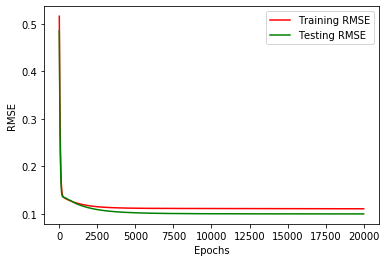

[0.18583076 0.24021251 0.53867407]


In [427]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 20000, 0)

In [428]:
theta, rmse_train

(array([0.18583076, 0.24021251, 0.53867407]),
 array([0.51643043, 0.51028345, 0.50422111, ..., 0.1107269 , 0.11072686,
        0.11072681]))

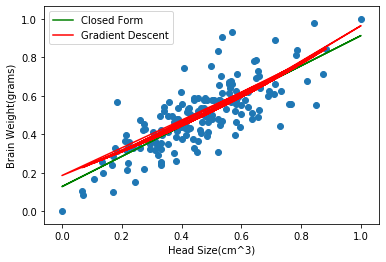

In [429]:
X_train1 = X_train[:, -1]
y_pred1 = theta1[0] + theta1[1] * X_train1
y_pred = X_train @ theta

# max_y_pred = np.max(y_pred) + 100
# min_y_pred = np.min(y_pred) - 100
# y_pred = np.linspace(min_y_pred, max_y_pred, 1000)

X_train = X_train[:, -1] 
plt.scatter(X_train, y_train)

# print(X_train.shape(), y_pred.shape())

plt.plot(X_train, y_pred1, c='green', label='Closed Form')

# max_x = np.max(X_train) + 100
# min_x = np.min(X_train) - 100
# X_train = np.linspace(min_x, max_x, 1000)

plt.plot(X_train, y_pred, label='Gradient Descent', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()